In [1]:
#Import Modules

import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

from torchview import draw_graph


import sys
sys.path.insert(0, "C:/Users/asalvi/Documents/Ameya_workspace/DiffusionDataset/ConeCamAngEst/training/") 
from modules.dataset import CustomDataset

In [ ]:
#Input to go through the neural network

#x = torch.sin(torch.linspace(0, 2 * torch.pi, 100)).unsqueeze(0).unsqueeze(0)  # (B:1, C:1, T:100)
#cond = torch.randn(1, 50)  # Shape: (B:1, len:50)

In [2]:
dataset = CustomDataset(
        csv_file=r"C:\Users\asalvi\Documents\Ameya_workspace\DiffusionDataset\ConeCamAngEst\csv_files\TSyn_data_filtered.csv",
        image_transform=transforms.Compose([
            transforms.Resize((96, 96)),
            transforms.ToTensor(),
            transforms.Normalize([0.5]*3, [0.5]*3)
        ]),
        input_seq=25, output_seq=100
    )
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)


In [4]:
batch = next(iter(dataloader))

print(f"Image Size:{batch['images'].shape}")     # (64, 25, 3, 96, 96)
print(f"IMU V Size:{batch['imu_v'].shape}")      # (64, 25)
print(f"IMU Omg Size:{batch['imu_omg'].shape}")    # (64, 25)
print(f"Action Size:{batch['actions'].shape}")    # (64, 100, 2)


Image Size:torch.Size([64, 25, 3, 96, 96])
IMU V Size:torch.Size([64, 25])
IMU Omg Size:torch.Size([64, 25])
Action Size:torch.Size([64, 100, 2])


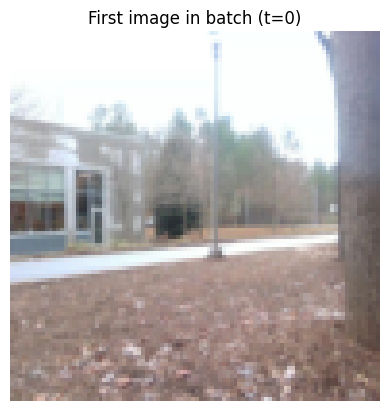

tensor(0.3931, dtype=torch.float64)
tensor(-0.0817, dtype=torch.float64)
tensor([[ 0.0000,  0.0000],
        [-0.0421,  0.0185],
        [-0.0765,  0.0335],
        [-0.2227,  0.0973],
        [-0.2227,  0.0973],
        [-0.2227,  0.0973],
        [-0.2227,  0.0973],
        [-0.2571,  0.1123],
        [-0.2923,  0.1277],
        [-0.3313,  0.1446],
        [-0.3620,  0.1580],
        [-0.4042,  0.1765],
        [-0.4449,  0.1942],
        [-0.4757,  0.2076],
        [-0.5156,  0.2250],
        [-0.5518,  0.2406],
        [-0.5853,  0.2551],
        [-0.6279,  0.2737],
        [-0.6564,  0.2861],
        [-0.6990,  0.3046],
        [-0.7330,  0.3192],
        [-0.7716,  0.3357],
        [-0.8083,  0.3517],
        [-0.8468,  0.3684],
        [-0.8785,  0.3821],
        [-0.9196,  0.4005],
        [-0.9542,  0.4161],
        [-0.9882,  0.4319],
        [-1.0233,  0.4490],
        [-1.0549,  0.4652],
        [-1.0948,  0.4870],
        [-1.1248,  0.5041],
        [-1.1598,  0.5253],
   

In [10]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF

# Get image tensor: shape (C, H, W)
img_tensor = batch['images'][0, 0]  # First sample, first timestep

# Convert from [-1, 1] back to [0, 1] for display (because you normalized earlier)
img_tensor = (img_tensor + 1) / 2

# Convert to NumPy array for plotting
img_np = TF.to_pil_image(img_tensor)

# Show the image
plt.imshow(img_np)
plt.title("First image in batch (t=0)")
plt.axis('off')
plt.show()

print(batch['imu_v'][0,0])
print(batch['imu_omg'][0,0])
print(batch['actions'][0,:,:])